In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

In [18]:
# INPUT_FILENAME     The name of the file that contains the data (CSV format)
# TRAINING_PART      The amount of data used to train the model 
#                         (0.5=50% of observations for training; 50% for validation)
# MINIMUMSPLIT       Controls the number of observations in each node
# MAX_DEPTH          Controls the number of nodes in the tree
# OUTPUT_COLUMN      The name of the column we'd like to predict
INPUT_FILENAME    = "surveylungcancer.csv"
TRAINING_PART     = 0.60
MAX_DEPTH         = 4
MINIMUMSPLIT      = 2000
OUTPUT_COLUMN     = 'LUNG_CANCER'

In [19]:
#turning csv file to pandas dataframe & separating features and the label
df = pd.read_csv(INPUT_FILENAME)
df = df.dropna(axis=0, how='any')

features = df.drop(columns = ['GENDER', OUTPUT_COLUMN])
target = df[OUTPUT_COLUMN]
print(features)

     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0     69        1               2        2              1                1   
1     74        2               1        1              1                2   
2     59        1               1        1              2                1   
3     63        2               2        2              1                1   
4     63        1               2        1              1                1   
..   ...      ...             ...      ...            ...              ...   
304   56        1               1        1              2                2   
305   70        2               1        1              1                1   
306   58        2               1        1              1                1   
307   67        2               1        2              1                1   
308   62        1               1        1              2                1   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING 

In [20]:
#getting the dummy values of the dataframe
dummyFeatures = pd.get_dummies(features)


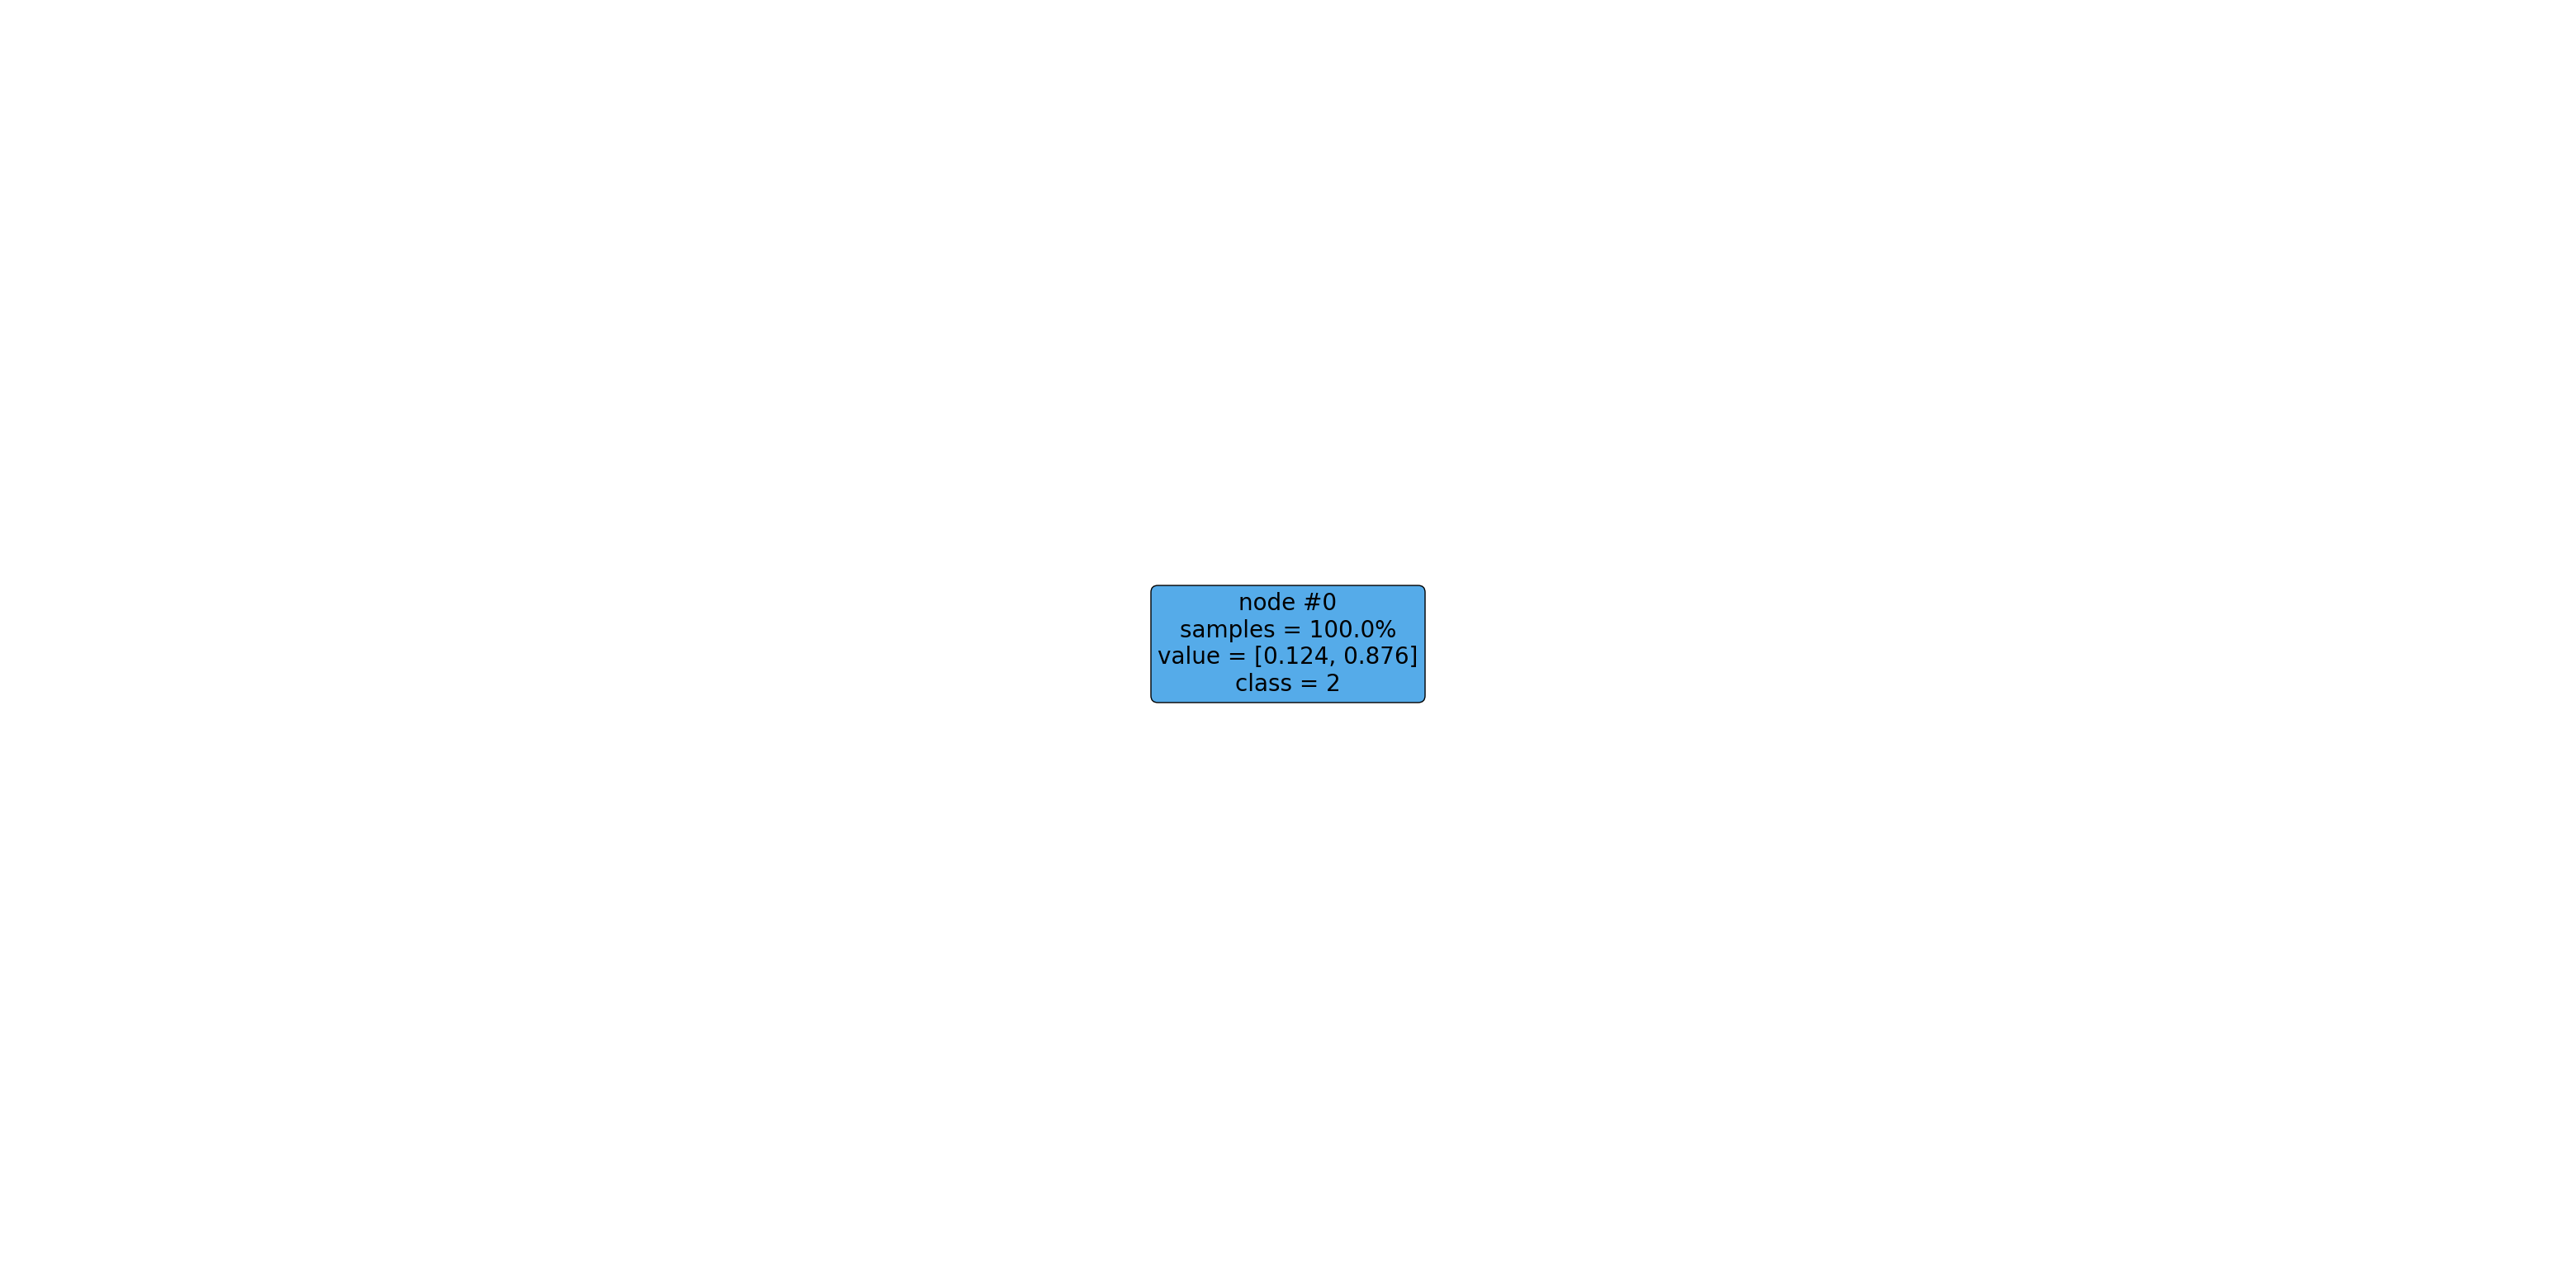

In [28]:
#splitting the dataset into a training and testing set
xTrain,xTest,yTrain,yTest = train_test_split(dummyFeatures, target, train_size = TRAINING_PART, random_state = 0, stratify = target)

#setting parameters for decision tree
dTree = DecisionTreeClassifier(max_depth = MAX_DEPTH, min_samples_split = MINIMUMSPLIT, random_state = 0)

#fitting the tree to the training model
dTree.fit(xTrain, yTrain)

featureNames = list(dummyFeatures.columns)

fig, ax = plt.subplots(figsize = (40,20))
tree.plot_tree(dTree, node_ids = True, proportion = True, impurity = False, fontsize=20, feature_names = featureNames, class_names = ['1','2'], rounded = True, filled = True)
plt.show()


In [22]:
#Getting predictions based on training and test sets
yTrainPred = dTree.predict(xTrain)
yTestPred = dTree.predict(xTest)

#evaluating the accuracy of each
trainAccuracy = accuracy_score(yTrainPred, yTrain)
testAccuracy = accuracy_score(yTestPred, yTest)
print(trainAccuracy, testAccuracy)

0.8756756756756757 0.8709677419354839


In [23]:
# Generating Confusion Matrices for the training set:
predicted = yTrainPred
observed = yTrain
confusionMatrix = confusion_matrix(observed, predicted)

print(confusionMatrix)

[[  0  23]
 [  0 162]]


In [24]:
# Generating Confusion Matrices for the validation set:
predictedVal = yTestPred
observedVal = yTest
confusionMatrixVal = confusion_matrix(observedVal, predictedVal)

print(confusionMatrixVal)

[[  0  16]
 [  0 108]]


In [25]:
# Correct Classification Rate:
# Check whether there is a match between each predicted value (in pred) and the actual value
predRateTraining = mean(yTrainPred == yTrain)
predRateValidation = mean(yTestPred == yTest)
trainingPercentage = "{:.2%}".format(predRateTraining)
validationPercentage = "{:.2%}".format(predRateValidation)

print("The correct classification rate based on the training set is " + trainingPercentage)
print("The correct classification rate based on the validation set is " + validationPercentage)

The correct classification rate based on the training set is 87.57%
The correct classification rate based on the validation set is 87.10%
